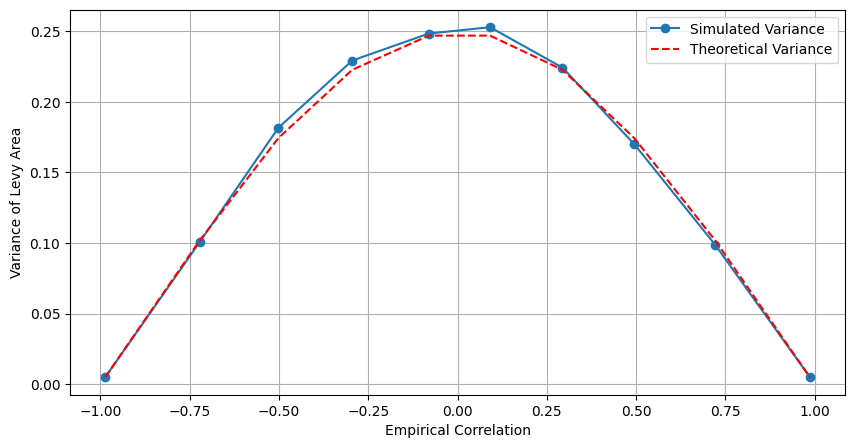

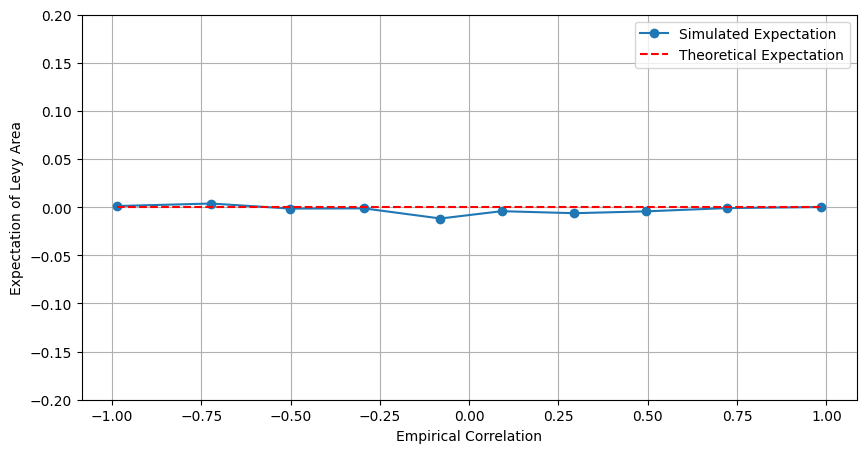

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0          # Time horizon
N = 1000         # Number of time steps
dt = T / N       # Time step size
M = 5000         # Number of simulations

# Function to generate correlated Brownian motions
def generate_correlated_bm(rho, N, T, M):
    dt = T / N
    dW1 = np.random.randn(M, N) * np.sqrt(dt)
    dW2 = np.random.randn(M, N) * np.sqrt(dt)
    
    # Cholesky decomposition for correlation
    dB1 = dW1
    dB2 = rho * dW1 + np.sqrt(1 - rho**2) * dW2
    
    # Compute Brownian motions by cumulative sum
    B1 = np.cumsum(dB1, axis=1)
    B2 = np.cumsum(dB2, axis=1)
    
    return B1, B2

# Function to compute the Levy area
def compute_levy_area(B1, B2, dt):
    return 0.5 * np.sum(B1[:, :-1] * np.diff(B2, axis=1) - B2[:, :-1] * np.diff(B1, axis=1), axis=1)

# Simulate for different correlations
rho_values = np.linspace(-0.99, 0.99, 10)
levy_area_vars = []
levy_area_means = []
empirical_correlations = []

theoretical_vars = [(1 - rho**2) * (T**2) / 4 for rho in rho_values]
theoretical_means = [0 for _ in rho_values]  # Theoretical expectation is always 0

for rho in rho_values:
    B1, B2 = generate_correlated_bm(rho, N, T, M)
    
    # Compute empirical correlation
    emp_corr = np.mean([np.corrcoef(B1[i], B2[i])[0, 1] for i in range(M)])
    empirical_correlations.append(emp_corr)
    
    # Compute Levy area statistics
    levy_areas = compute_levy_area(B1, B2, dt)
    levy_area_vars.append(np.var(levy_areas))
    levy_area_means.append(np.mean(levy_areas))

# Plot variance results
plt.figure(figsize=(10, 5))
plt.plot(empirical_correlations, levy_area_vars, 'o-', label='Simulated Variance')
plt.plot(empirical_correlations, theoretical_vars, 'r--', label='Theoretical Variance')
plt.xlabel('Empirical Correlation')
plt.ylabel('Variance of Levy Area')
#plt.title('Levy Area Variance vs Correlation')
plt.legend()
plt.grid()
plt.savefig('levy_area_variance_correlation.png')
plt.show()

# Plot expectation results
plt.figure(figsize=(10, 5))
plt.plot(empirical_correlations, levy_area_means, 'o-', label='Simulated Expectation')
plt.plot(empirical_correlations, theoretical_means, 'r--', label='Theoretical Expectation')
plt.xlabel('Empirical Correlation')
plt.ylabel('Expectation of Levy Area')
#plt.title('Levy Area Expectation vs Correlation')
plt.legend()
plt.grid()
plt.ylim((-0.2,0.2))
plt.savefig('levy_area_expectation_correlation.png')
plt.show()
